**Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of this work is to develop a churn prediction model that assists telecom operators in predicting customers who are most likely subject to churn.**

Loading Necessary Libraries and Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import pickle
import sklearn.metrics

Loading the Dataset as "churn"

In [ ]:
churn = pd.read_csv('/content/drive/My Drive/CustomerChurning/CustomerChurn_dataset.csv')
og = churn.copy()

Removing "Customer_ID" from the dataset

In [ ]:
churn.drop("customerID",axis =1, inplace = True)
og.drop("customerID", axis=1, inplace= True)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


FEATURE ENGINEERING
-IMPUTING

In [ ]:
# Imputing Numerical Columns
numerical_imputer = SimpleImputer(strategy='mean')
for column in churn.select_dtypes(include= "number").columns:
  churn[column] = numerical_imputer.fit_transform(churn.select_dtypes(include='number'))

In [ ]:
#Imputing Categorical Columns
for column in churn.select_dtypes(include= "object").columns:
  churn[column] = churn[column].fillna(churn[column].mode()[0])

FEATURE ENGINEERING: ENCODING

In [ ]:
# Label encode categorical variables
label_encoder = LabelEncoder()

for column in churn.select_dtypes(include='object').columns:
    churn[column] = label_encoder.fit_transform(churn[column])



Question 1: Using the given dataset, extract the relevant features that can define a customer churn.

In [ ]:
X = churn.drop(columns=["Churn"])
Y = churn["Churn"]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
scaled_Y = scaler.fit_transform(pd.DataFrame(Y))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X, scaled_Y, test_size=0.2, random_state=42)

<ipython-input-11-d87dbf4d0b10>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


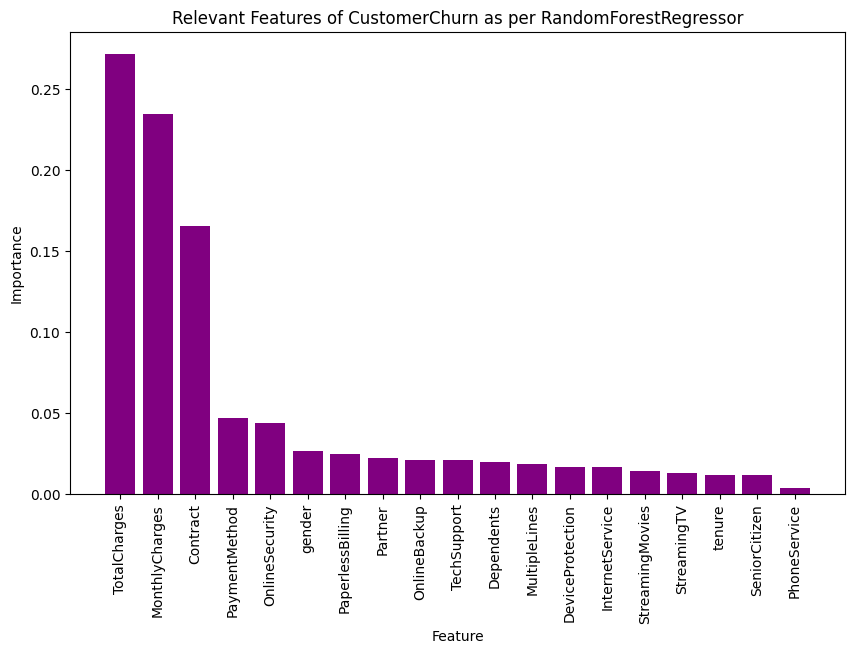

In [ ]:
# RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
#putting important features in a list for Question 3.
features = []
for i in range(X.shape[1]):
  features.append(X.columns[indices[i]] )

# Plotting the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center", color= "purple")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Relevant Features of CustomerChurn as per RandomForestRegressor")
plt.show()


Question 2:

Use your EDA(Exploratory Data Analysis) skills to find out which customer profiles relate to churning a lot.


In [ ]:
#Installing necessary libraries
!pip install -U dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 77.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.2 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252698 sha256=b84c4120e

In [ ]:
import dataprep.eda as dp

In [ ]:
#Plotting the correlation between churn and all other variables in the dataset
dp.plot_correlation(churn, "Churn")

In [ ]:
more_churn = []
#Plotting bivariate displays of variables in the dataset against churn
for column in churn.columns:
  if column != "Churn":
    display(dp.plot(churn, column, "Churn" ))
    #Identify groups more likely to churn
    mean_churn = churn.groupby(column)["Churn"].mean()
    max_mean_group = mean_churn.idxmax()
    #Save profiles for the group with the maximum mean churn
    more_churn.append({'column': column,'group_id': max_mean_group,})

In [ ]:
more_churn

[{'column': 'gender', 'group_id': 0},
 {'column': 'SeniorCitizen', 'group_id': 23.15},
 {'column': 'Partner', 'group_id': 0},
 {'column': 'Dependents', 'group_id': 0},
 {'column': 'tenure', 'group_id': 1.0},
 {'column': 'PhoneService', 'group_id': 1},
 {'column': 'MultipleLines', 'group_id': 2},
 {'column': 'InternetService', 'group_id': 1},
 {'column': 'OnlineSecurity', 'group_id': 0},
 {'column': 'OnlineBackup', 'group_id': 0},
 {'column': 'DeviceProtection', 'group_id': 0},
 {'column': 'TechSupport', 'group_id': 0},
 {'column': 'StreamingTV', 'group_id': 0},
 {'column': 'StreamingMovies', 'group_id': 0},
 {'column': 'Contract', 'group_id': 0},
 {'column': 'PaperlessBilling', 'group_id': 1},
 {'column': 'PaymentMethod', 'group_id': 2},
 {'column': 'MonthlyCharges', 'group_id': 1.0},
 {'column': 'TotalCharges', 'group_id': 2}]

more_churn is a list of column names and the groups they contain that are more likely to churn. By comparing the labels of the original dataset above, to the current imputed and encoded one. We can make sense of the data in more_churn

In [ ]:
churn.head(12)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,29.85,1,0,0.0,0,1,0,0,2,0,0,0,0,0,1,2,1.0,2505,0
1,1,56.95,0,0,0.0,1,0,0,2,0,2,0,0,0,1,0,3,34.0,1466,0
2,1,53.85,0,0,0.0,1,0,0,2,2,0,0,0,0,0,1,3,2.0,157,1
3,1,42.30,0,0,0.0,0,1,0,2,0,2,2,0,0,1,0,0,45.0,1400,0
4,0,70.70,0,0,0.0,1,0,1,0,0,0,0,0,0,0,1,2,2.0,925,1
5,0,99.65,0,0,0.0,1,2,1,0,0,2,0,2,2,0,1,2,8.0,6104,1
6,1,89.10,0,1,0.0,1,2,1,0,2,0,0,2,0,0,1,1,22.0,1550,0
7,0,29.75,0,0,0.0,0,1,0,2,0,0,0,0,0,0,0,3,10.0,2609,0
8,0,104.80,1,0,0.0,1,2,1,0,0,2,2,2,2,0,1,2,28.0,2646,1
9,1,56.15,0,1,0.0,1,0,0,2,2,0,0,0,0,1,0,0,62.0,3022,0


In [ ]:
#Original dataset
og.head(12)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Profiles more likely to churn are: Females without partners and dependents, that have phoneservice, multiple phone lines and fibre optic internet service, but no onlinesecurity, online backup, device protection, techsupport, streamingTV, streamingMovies. They also have month-to-month contracts, use paperless billing and pay by electronic check.

QUESTION 3:Using the features in (1) define and train a Multi-Layer Perceptron model using the Functional API

In [ ]:
features

['TotalCharges',
 'MonthlyCharges',
 'Contract',
 'PaymentMethod',
 'OnlineSecurity',
 'gender',
 'PaperlessBilling',
 'Partner',
 'OnlineBackup',
 'TechSupport',
 'Dependents',
 'MultipleLines',
 'DeviceProtection',
 'InternetService',
 'StreamingMovies',
 'StreamingTV',
 'tenure',
 'SeniorCitizen',
 'PhoneService']

In [ ]:
pip install scikeras


Creating and Training the Model and recording it's accuracy


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from keras.models import Model
from keras.layers import Input, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler

#Scaling the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(churn[features]), columns=features)
Y = scaler.fit_transform(pd.DataFrame(churn["Churn"]))

#Labelling encoding so we can use KerasClassifier
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)


# Split the data into training and testing sets
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y_encoded, test_size=0.2, random_state=42)

# Define the Keras functional API model
def create_model(optimizer='adam', hidden_units=64):
    inputs = Input(shape=(19,))
    hidden = Dense(64, activation='relu')(inputs)
    outputs = Dense(1, activation='sigmoid')(hidden)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model with the scikit-learn interface
keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


# Train and evaluate the model
keras_model.fit(X_Train, y_Train)
y_pred = keras_model.predict(X_Test)
auc_score = roc_auc_score(y_Test, y_pred)
print(f'AUC Score before GridSearchCV: {auc_score}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


AUC Score before GridSearchCV: 0.7397264173403584


Optimizing, CrossValidating and Retraining the model using GridSearchCV

In [ ]:
# Define the hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'sgd'],
    "epochs" : [10, 20, 30],
    "batch_size": [32, 64, 100]
    }

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_result = grid_search.fit(X_Train, y_Train)

# Get the best parameters and their corresponding AUC score
best_params = grid_result.best_params_
best_auc = grid_result.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best AUC Score: {best_auc}')

# Train and evaluate the model with the best parameters
best_model = grid_result.best_estimator_
best_model.fit(X_Train, y_Train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best Parameters: {'batch_size': 64, 'epochs': 10, 'optimizer': 'sgd'}
Best AUC Score: 0.8349648338118815


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7fa1d0195360>
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [ ]:
y_pred_best = best_model.predict(X_Test)
best_auc_score = roc_auc_score(y_Test, y_pred_best)
best_auc_score

0.7368306644446055

Saving the Model for Deployment later

In [ ]:
import pickle
pickle.dump(best_model, open('modell.pkl','wb'))
pickle.dump(scaler, open("scale.pkl", "wb"))